In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

In [3]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# สํารวจโครงสร้างข้อมูล
print("ชื่อบุคคลในชุดข้อมูล:")
print(faces.target_names)
print(f"\nรูปร่างของข้อมูลภาพ: {faces.images.shape}")
print(f"รูปร่างของข้อมูลที่แปลงแล้ว: {faces.data.shape}")
print(f"จํานวนคลาส: {len(faces.target_names)}")

ชื่อบุคคลในชุดข้อมูล:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']

รูปร่างของข้อมูลภาพ: (1288, 50, 37)
รูปร่างของข้อมูลที่แปลงแล้ว: (1288, 1850)
จํานวนคลาส: 7


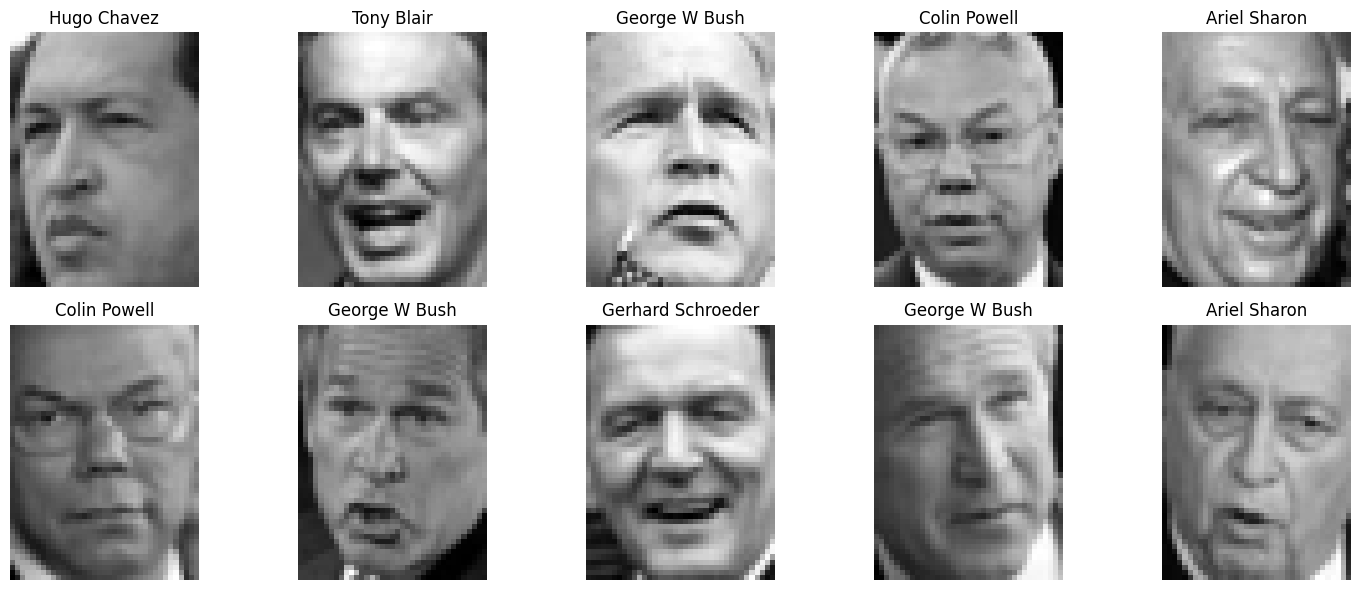

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_title(faces.target_names[faces.target[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [22]:
# แบ่งข้อมูลเป็น training และ testing sets
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"ขนาดข้อมูล Training: {X_train.shape}")
print(f"ขนาดข้อมูล Testing: {X_test.shape}")


ขนาดข้อมูล Training: (966, 1850)
ขนาดข้อมูล Testing: (322, 1850)


In [ ]:
# ปรับมาตรฐานข้อมูลให้มีค่าเฉลี่ย 0 และค่าเบี่ยงเบนมาตรฐาน 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # ปรับมาตรฐานข้อมูล training set เพื่อให้มีค่าเฉลี่ย 0 และเบี่ยงเบนมาตรฐาน 1
X_test_scaled = scaler.transform(X_test) # ปรับมาตรฐานข้อมูล testing set โดยไม่ใช้ fit อีกครั้ง เพราะต้องการใช้ค่าเฉลี่ยและเบี่ยงเบนมาตรฐานเดียวกันกับ training set

print("การปรับมาตรฐานข้อมูลเสร็จสิ้น")


การปรับมาตรฐานข้อมูลเสร็จสิ้น


In [26]:
# สร้างโมเดล SVM ด้วย linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# ฝึกสอนโมเดล
print("กําลังฝึกสอนโมเดล...")
svm_model.fit(X_train_scaled, y_train)
print("การฝึกสอนเสร็จสิ้น")

กําลังฝึกสอนโมเดล...
การฝึกสอนเสร็จสิ้น


In [27]:
# ทํานายผลลัพธ์บนข้อมูลทดสอบ
y_pred = svm_model.predict(X_test_scaled)

# คํานวณความแม่นยํา
accuracy = accuracy_score(y_test, y_pred)
print(f"ความแม่นยําของโมเดล: {accuracy:.4f} ({accuracy*100:.2f}%)")


ความแม่นยําของโมเดล: 0.8571 (85.71%)


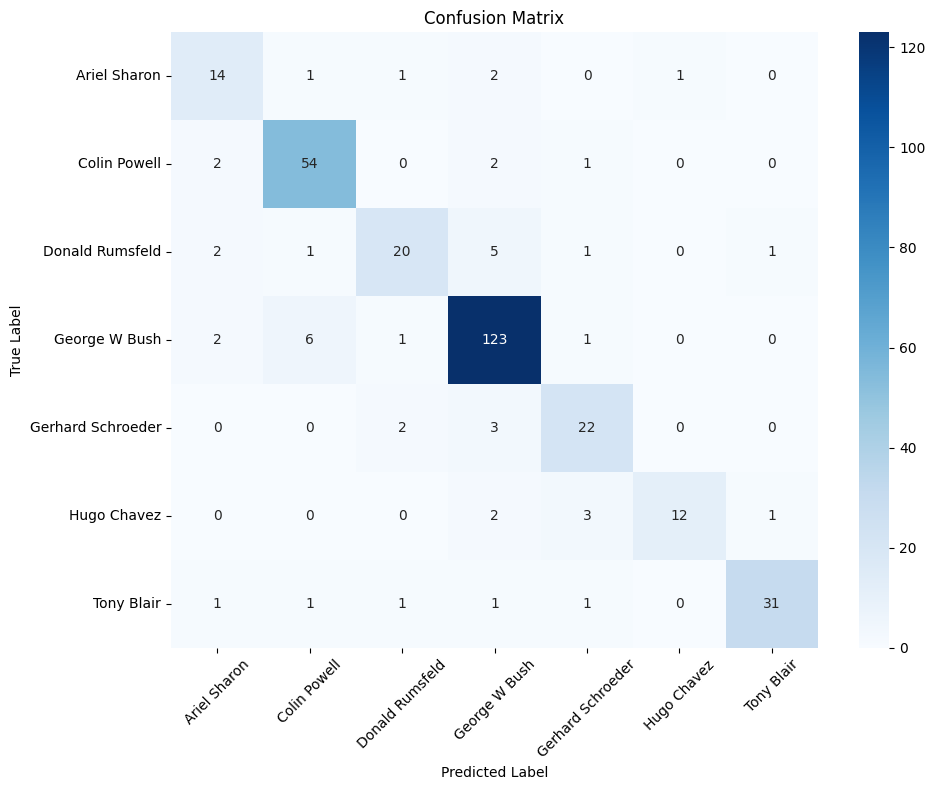

In [28]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงผล Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

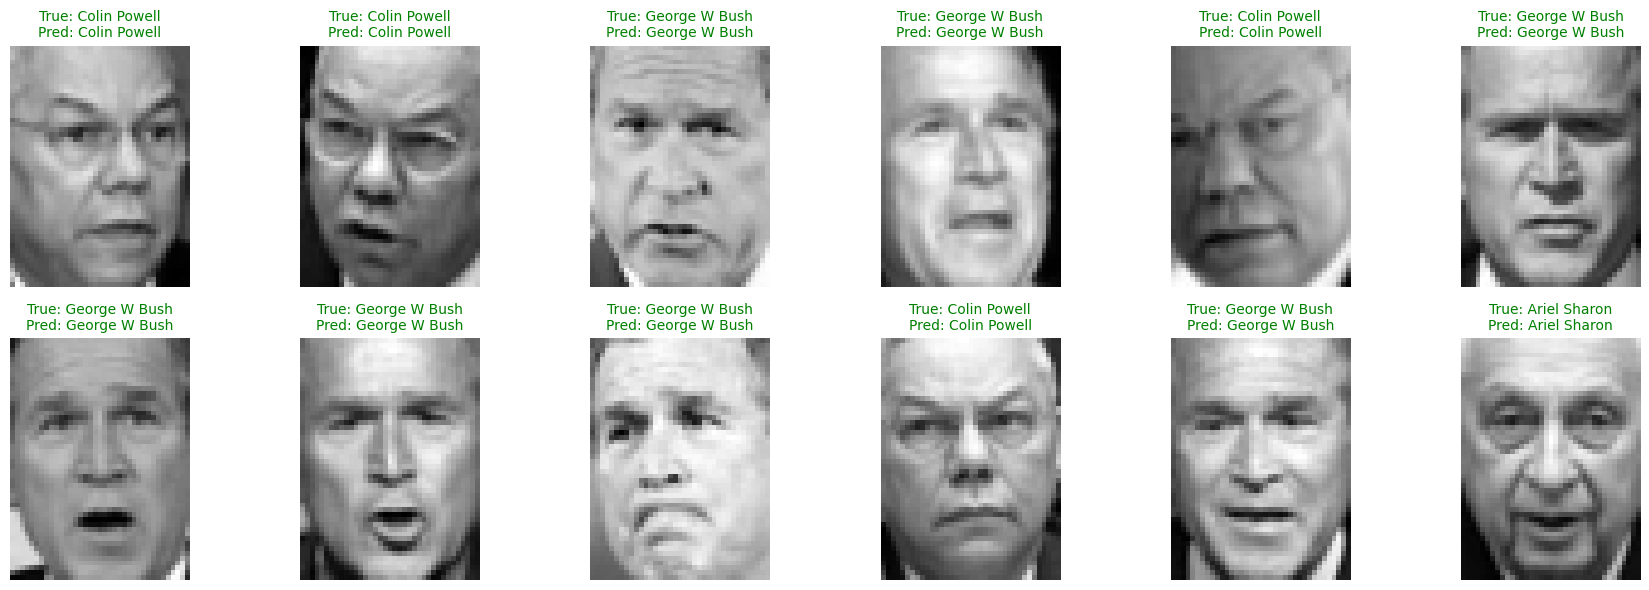

In [29]:
# แสดงตัวอย่างการทํานาย
fig, axes = plt.subplots(2, 6, figsize=(18, 6))
for i, ax in enumerate(axes.flat):
    if i < len(X_test):
# แปลงข้อมูลกลับเป็ นรูปภาพ
        image = X_test[i].reshape(faces.images.shape[1:])
        ax.imshow(image, cmap='gray')

 # แสดงป้ายกํากับจริงและการทํานาย
        true_label = faces.target_names[y_test[i]]
        pred_label = faces.target_names[y_pred[i]]

        color = 'green' if y_test[i] == y_pred[i] else 'red'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}',
            color=color, fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

# ลองใช้ kernel ต่างๆ

In [ ]:
# ทดลอง 3 kernel
kernels = ['linear', 'rbf', 'poly']
results = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    accuracy = svm.score(X_test_scaled, y_test)
    results.append([kernel, accuracy])

# แสดงผลเป็ นตาราง
print("Kernel\t\tAccuracy")
for result in results:
        print(f"{result[0]}\t\t{result[1]:.4f}")
